Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
x shape: (1620, 224, 224, 3), y shape:(1620, 7)


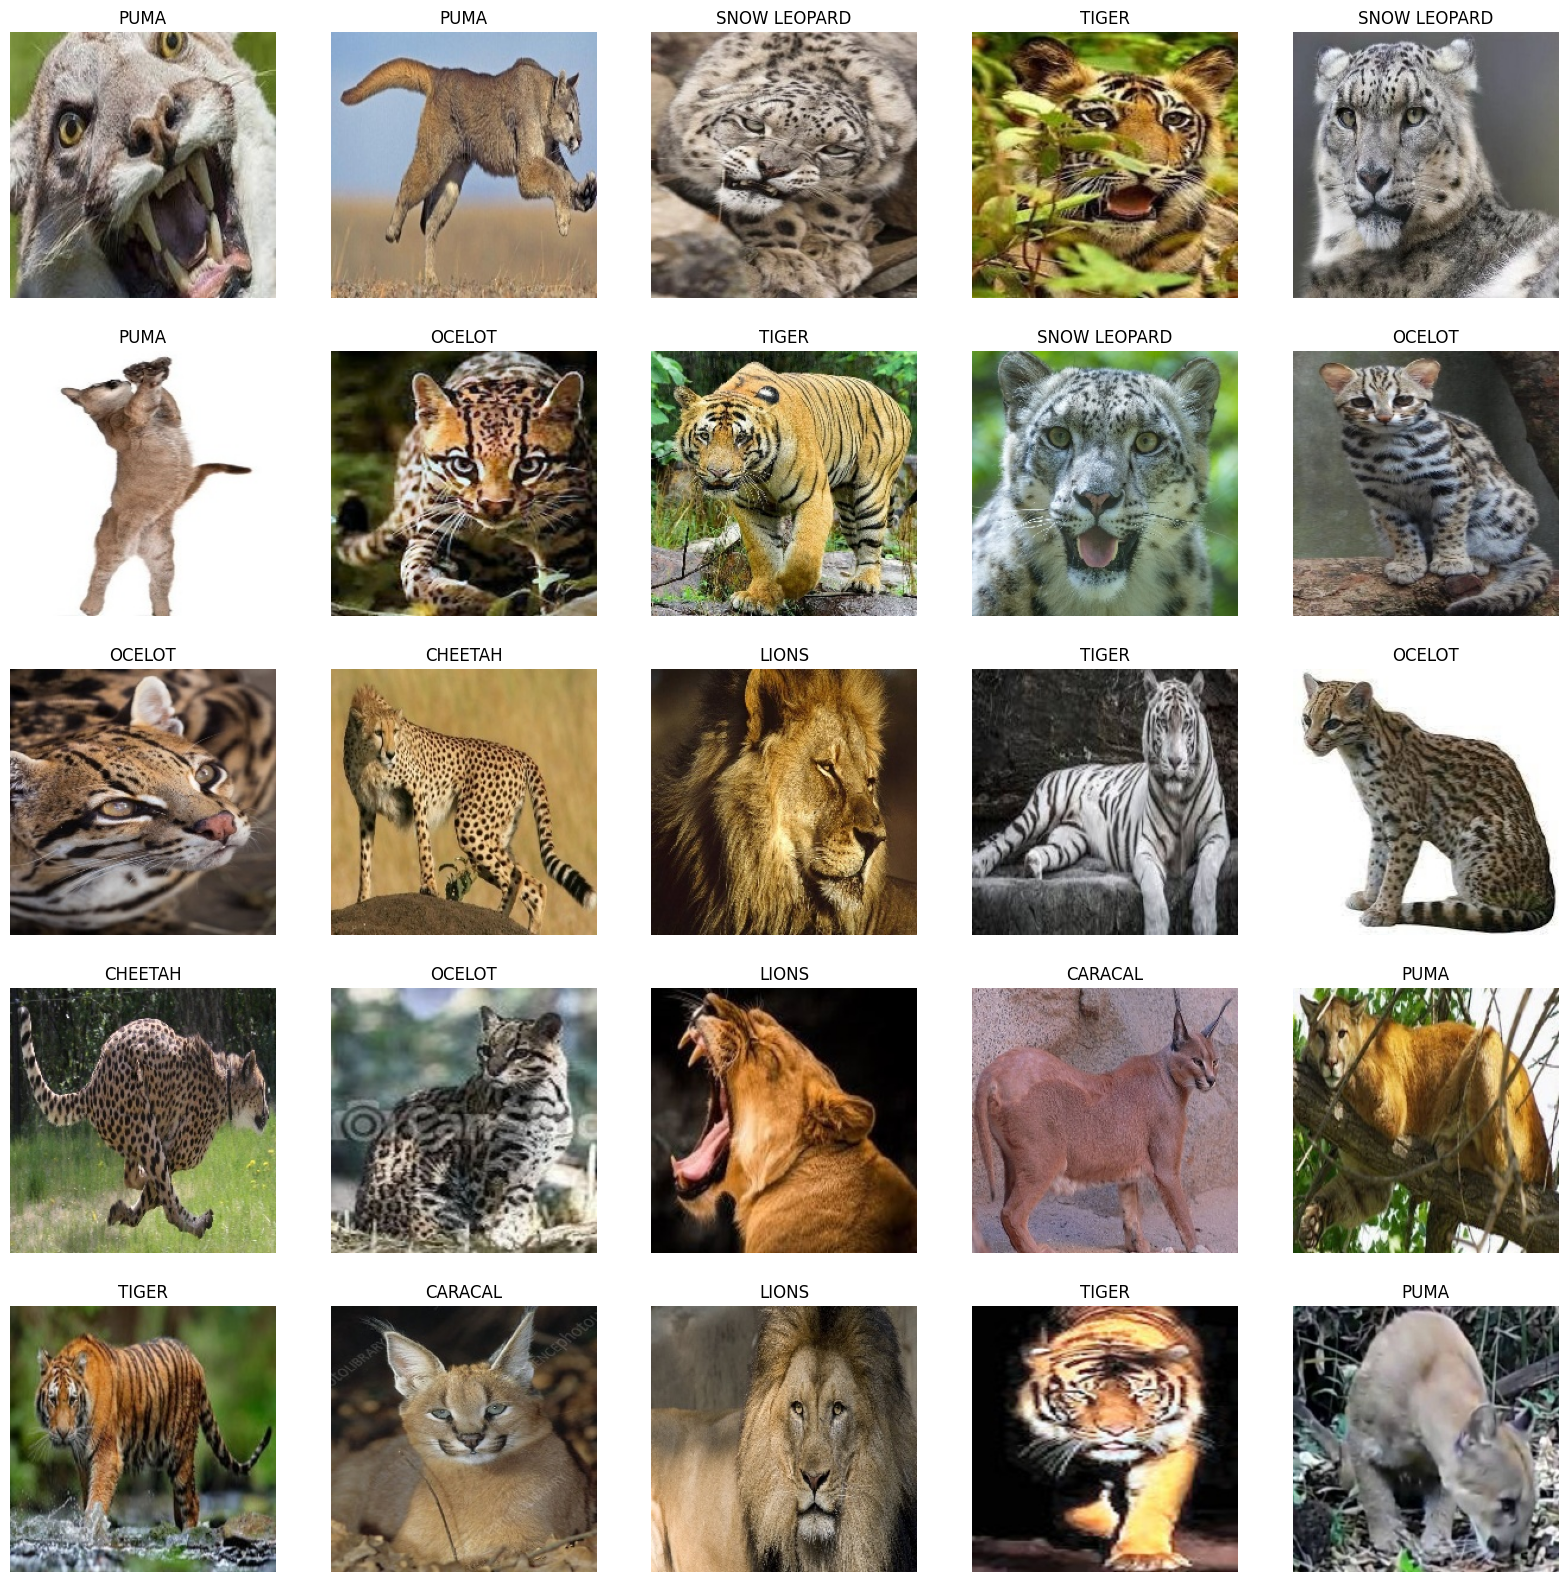

In [4]:
from utils import *

classes = ['CHEETAH' ,'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER']
imgs, labels = load_imgs('../Dataset', classes)
x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
print('x shape: {}, y shape:{}'.format(x.shape, y.shape))
plot_sample(imgs, labels, 5, 5, resize=(224, 224))

2023-05-11 16:58:04.559360: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
Epoch 1/10
36/36 [==============================] - 18s 438ms/step - loss: 39.3354 - accuracy: 0.1605 - val_loss: 18.3939 - val_accuracy: 0.1646
Epoch 2/10
36/36 [==============================] - 16s 460ms/step - loss: 15.0587 - accuracy: 0.1984 - val_loss: 8.4544 - val_accuracy: 0.2058
Epoch 3/10
36/36 [==============================] - 14s 389ms/step - loss: 8.2227 - accuracy: 0.2557 - val_loss: 9.9312 - val_accuracy: 0.2798
Epoch 4/10
36/36 [==============================] - 15s 431ms/step - loss: 7.2880 - accuracy: 0.2937 - val_loss: 6.4906 - val_accuracy: 0.2757
Epoch 5/10
36/36 [==============================] - 16s 440ms/step - loss: 6.4596 - accuracy: 0.2963 - val_loss: 8.4634 - val_accuracy: 0.2922
Epoch 6/10
36/

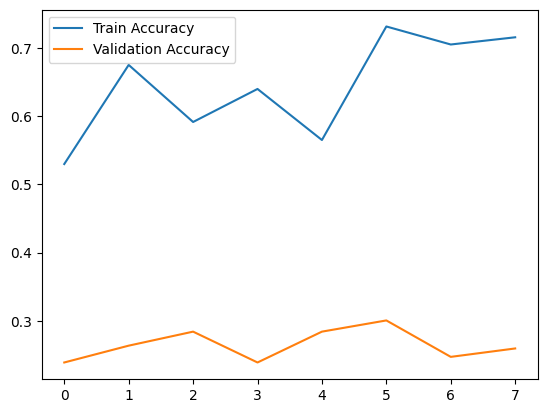

INFO:tensorflow:Assets written to: nn_model/assets


INFO:tensorflow:Assets written to: nn_model/assets


8/8 [==============================] - 0s 25ms/step
TP: 71
TN: 1286
FP: 172
FN: 172



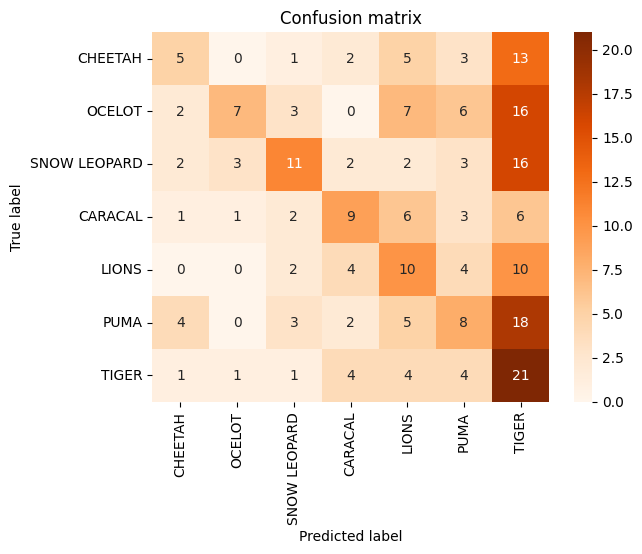

In [1]:
################### Task 1 ###################
# Solution go here
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import *
from keras.callbacks import EarlyStopping


# Load Image from Dataset folder
classes = ['CHEETAH' ,'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER']
imgs, labels = load_imgs('../Dataset', classes)
x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
n_classes = len(classes)
# Normalize x
x = x / 255.
# Split X and Y
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

def build_model_FFNN():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(256, activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(len(classes), activation='softmax'))
    return model

batch_size = 32
epochs = 30
TRAIN_MODEL_FFNN = 1
if TRAIN_MODEL_FFNN:
    model = build_model_FFNN()
    
    # Add early stopping to avoid overfitting and  prapare model to the train
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val, y_val),verbose=1, callbacks=[es])

    #evaluate model and print history
    scores = model.evaluate(x_test, y_test)
    print(scores)
    plot_hystory(history)
    save_keras_model(model, "nn_model")
    plot_disMat("nn_model", x_test, y_test, classes)
    calculate_value_CM("nn_model", x_test, y_test, classes)




In [8]:
################### Task 1 Bonus ###################
# Solution go here
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import *
from keras.callbacks import EarlyStopping


# Load Image from Dataset folder
classes = ['CHEETAH' ,'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER']
imgs, labels = load_imgs('../Dataset', classes)
x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
n_classes = len(classes)




# i want the mean color beacuse tha tcan be used to understand the color of image
# i want black and gray because some animals have black color
# i want white for white animal
def comput_color(img):
    n = img.shape[0]
    pixel_count = n * n
    total_color = np.sum(img, axis=(0, 1))

    # monocromatic color have similar R G B value, diff_mono choose the max diversity of canal for say is 
    # monocromatic or not
    diff_mono = 15

    black_gray = 0
    white_gray = 0

    for i in range(n):
        for j in range(n):
            r, g, b = img[i, j]

            # Calcola la differenza tra i canali RGB per determinare se il colore è acromatico
            diff_rg = abs(r - g)
            diff_rb = abs(r - b)
            diff_gb = abs(g - b)

            if diff_rg < diff_mono and diff_rb < diff_mono and diff_gb < diff_mono:
                black_gray += 1
            elif r >= 255 - diff_mono and g >= 255 - diff_mono and b >= 255 - diff_mono:
                white_gray += 1

    mean_color = total_color // pixel_count

    min_color = np.min(img, axis=(0, 1))
    max_color = np.max(img, axis=(0, 1))

    return mean_color, black_gray, white_gray, min_color, max_color


def ratio_color(img):
    red_count = 0
    blue_count = 0
    yellow_count = 0
    total_count = img.shape[0] * img.shape[1]

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r, g, b = img[i, j]
            if r > g and r > b:
                red_count += 1
            elif b > r and b > g:
                blue_count += 1
            elif r > g and b > g:
                yellow_count += 1

    red_ratio = red_count / total_count
    blue_ratio = blue_count / total_count
    yellow_ratio = yellow_count / total_count

    return red_ratio, blue_ratio, yellow_ratio



def comput_hysto(img):
    # Calcola l'istogramma per l'immagine
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
    return hist, bins


def prepare_data(images):
    features = []
    for img in images:
        color_feature, black_gray, white_gray, min_color, max_color = comput_color(img)
        ratio_red, ratio_blue, ratio_yellow = ratio_color(img)
        hist, bins = comput_hysto(img)

        # Unisci tutte le feature estratte in un singolo vettore
        feature_vector = np.concatenate([
            color_feature, [black_gray, white_gray], min_color, max_color, [ratio_red, ratio_blue, ratio_yellow], hist
        ])
        features.append(feature_vector)

    features = np.array(features)

    return features

x_new = prepare_data(x)


x_train, x_temp, y_train, y_temp = train_test_split(x_new, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    
# Add early stopping to avoid overfitting and  prapare model to the train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val, y_val),verbose=1, callbacks=[es])

#evaluate model and print history
scores = model.evaluate(x_test, y_test)
print(scores)
plot_hystory(history)
save_keras_model(model, "nn_model_bonus")
plot_disMat("nn_model_bonus", x_test, y_test, classes)
calculate_value_CM("nn_model_bonus", x_test, y_test, classes)



Loaded 240 images of class CHEETAH


KeyboardInterrupt: 

Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
Epoch 1/30
36/36 [==============================] - 22s 586ms/step - loss: 1.8908 - accuracy: 0.1993 - val_loss: 1.8156 - val_accuracy: 0.2428
Epoch 2/30
36/36 [==============================] - 20s 557ms/step - loss: 1.6727 - accuracy: 0.3360 - val_loss: 1.5537 - val_accuracy: 0.4074
Epoch 3/30
36/36 [==============================] - 24s 666ms/step - loss: 1.4822 - accuracy: 0.4286 - val_loss: 1.6873 - val_accuracy: 0.3457
Epoch 4/30
36/36 [==============================] - 20s 564ms/step - loss: 1.3041 - accuracy: 0.4859 - val_loss: 1.4455 - val_accuracy: 0.4074
Epoch 5/30
36/36 [==============================] - 20s 546ms/step - loss: 1.1285 - accuracy: 0.5679 - val_loss: 1.2952 - val_accuracy: 0.4938
Epoch 6/30
36/36 

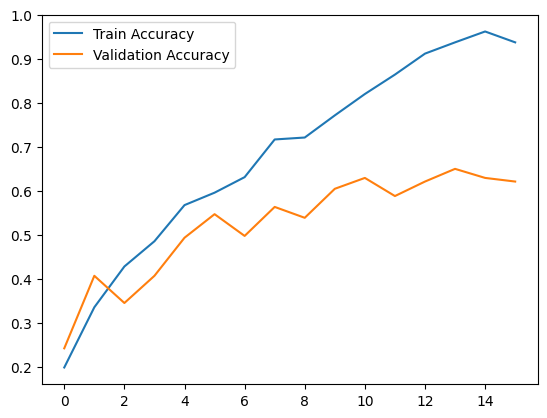

INFO:tensorflow:Assets written to: first_Cnn/assets


INFO:tensorflow:Assets written to: first_Cnn/assets


8/8 [==============================] - 1s 121ms/step
TP: 166
TN: 1381
FP: 77
FN: 77

Epoch 1/30


2023-05-11 17:11:17.414522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - ETA: 0s - loss: 1.1311 - accuracy: 0.5536

2023-05-11 17:11:33.318346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - 16s 471ms/step - loss: 1.1311 - accuracy: 0.5536 - val_loss: 0.7422 - val_accuracy: 0.7200
Epoch 2/30
32/32 [==============================] - 15s 461ms/step - loss: 0.9319 - accuracy: 0.6637 - val_loss: 1.3402 - val_accuracy: 0.5200
Epoch 3/30
32/32 [==============================] - 15s 457ms/step - loss: 0.8923 - accuracy: 0.6671 - val_loss: 1.3422 - val_accuracy: 0.5600
Epoch 4/30
32/32 [==============================] - 17s 531ms/step - loss: 0.9231 - accuracy: 0.6492 - val_loss: 2.0064 - val_accuracy: 0.3600
Epoch 5/30
32/32 [==============================] - 19s 585ms/step - loss: 0.7537 - accuracy: 0.7194 - val_loss: 0.9523 - val_accuracy: 0.5600
Epoch 6/30
8/8 [==============================] - 1s 129ms/step - loss: 1.0659 - accuracy: 0.5761
[1.0658979415893555, 0.5761317014694214]


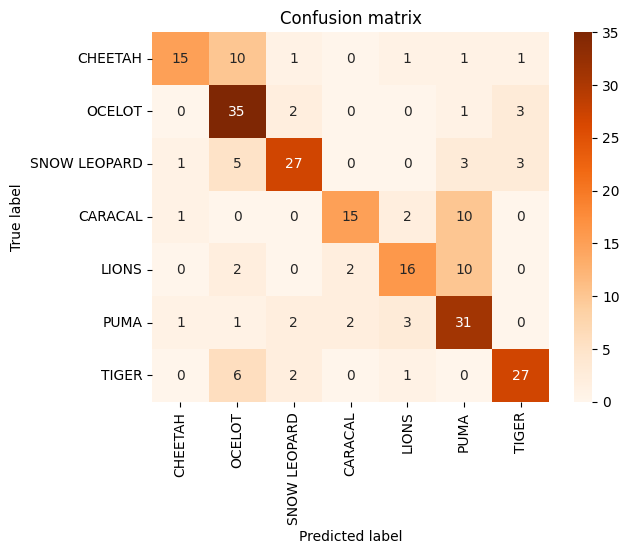

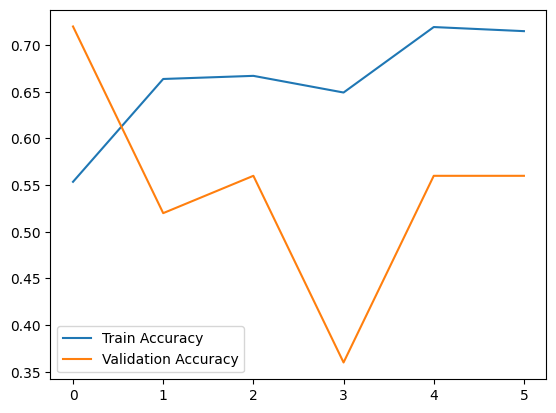

INFO:tensorflow:Assets written to: second_Cnn/assets


INFO:tensorflow:Assets written to: second_Cnn/assets


8/8 [==============================] - 1s 151ms/step
TP: 140
TN: 1355
FP: 103
FN: 103

8/8 [==============================] - 1s 135ms/step
ClT =  -0.5572875402878829
variance first_Cnn = 0.059904314004769775
variance second_Cnn = 0.07101667335048499
model are same
Epoch 1/30


2023-05-11 17:13:07.924730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - ETA: 0s - loss: 1.3157 - accuracy: 0.4970

2023-05-11 17:13:30.028016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - 23s 678ms/step - loss: 1.3157 - accuracy: 0.4970 - val_loss: 0.9610 - val_accuracy: 0.5625
Epoch 2/30
32/32 [==============================] - 20s 621ms/step - loss: 1.1453 - accuracy: 0.5547 - val_loss: 0.7670 - val_accuracy: 0.6875
Epoch 3/30
32/32 [==============================] - 21s 646ms/step - loss: 1.1169 - accuracy: 0.5676 - val_loss: 1.4129 - val_accuracy: 0.5625
Epoch 4/30
32/32 [==============================] - 20s 627ms/step - loss: 1.1037 - accuracy: 0.5746 - val_loss: 1.2791 - val_accuracy: 0.5000
Epoch 5/30
32/32 [==============================] - 22s 670ms/step - loss: 1.0036 - accuracy: 0.6133 - val_loss: 0.8016 - val_accuracy: 0.6875
Epoch 6/30
32/32 [==============================] - 20s 618ms/step - loss: 1.0890 - accuracy: 0.5875 - val_loss: 0.8699 - val_accuracy: 0.7500
Epoch 7/30
32/32 [==============================] - 23s 701ms/step - loss: 0.9860 - accuracy: 0.6372 - val_loss: 0.7406 - val_accuracy: 0.7500
Epoch 8/30

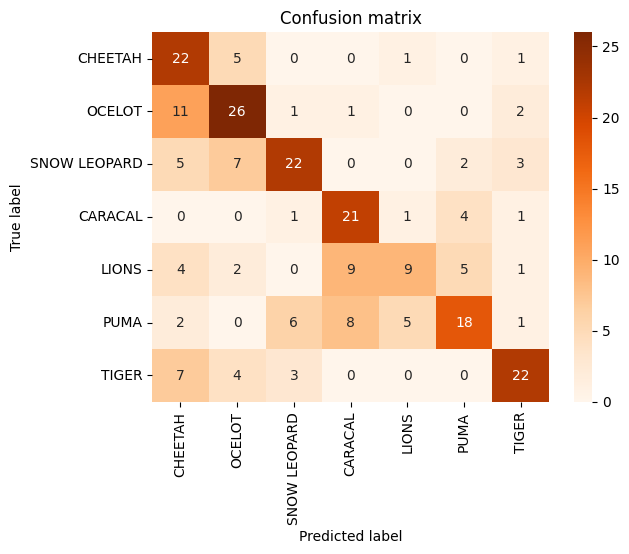

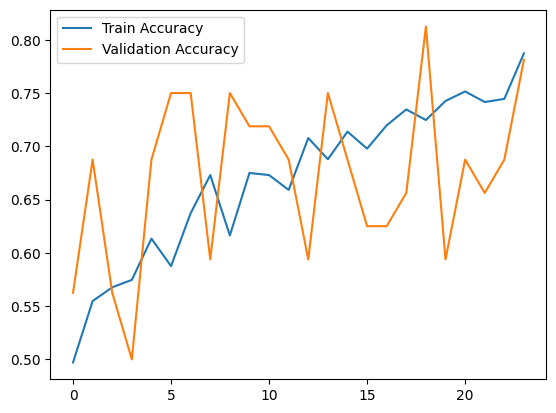

INFO:tensorflow:Assets written to: third_Cnn/assets


INFO:tensorflow:Assets written to: third_Cnn/assets


8/8 [==============================] - 1s 136ms/step
TP: 199
TN: 1414
FP: 44
FN: 44

8/8 [==============================] - 1s 137ms/step
ClT =  1.8011133931050574
variance second_Cnn = 0.07101667335048499
variance third_Cnn = 0.03738212716423437
model are same
8/8 [==============================] - 1s 131ms/step
ClT =  3.6998362748064992
variance nn_model = 0.11402133535093623
variance third_Cnn = 0.03738212716423437
third_Cnn  model better


'third_Cnn'

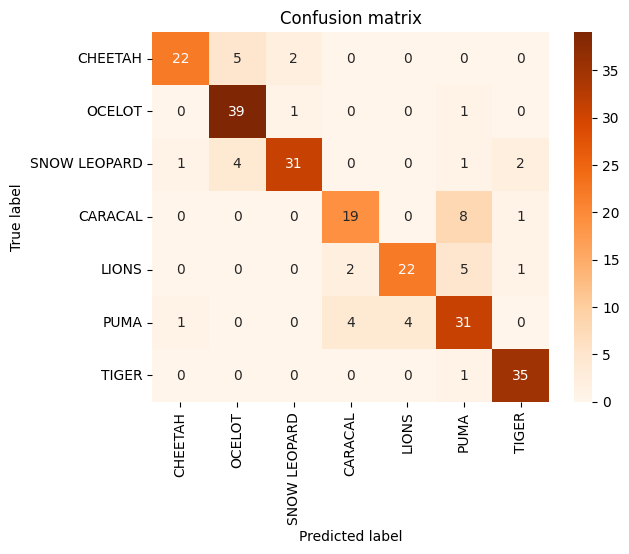

In [2]:
################### Task 2 ###################
# Solution go here

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import *

# Load Image from Dataset folder
classes = ['CHEETAH' ,'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER']
imgs, labels = load_imgs('../Dataset', classes)
x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
n_classes = len(classes)
# Normalize x
x = x / 255.
# Split X and Y
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


# FIRST TRAIN OF CNN

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

# Function to build our model 
def build_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(classes) , activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    return model

batch_size = 32
epochs = 30

# ________________________________
# ________________________________
# FIRST TRAIN WITHOUT MODIFY IMAGE
# ________________________________
# ________________________________

FIRST_TRAIN_CNN = 1
if FIRST_TRAIN_CNN:
    model = build_model()
    # Add early stopping to avoid overfitting and  prapare model to the train
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val, y_val), verbose=1,callbacks=[es])
    # Evaluate model
    scores = model.evaluate(x_test, y_test)
    print(scores)
    plot_hystory(history)
    save_keras_model(model, "first_Cnn")
    plot_disMat("first_Cnn", x_test, y_test, classes)
    calculate_value_CM("first_Cnn", x_test, y_test, classes)


# ________________________________
# ________________________________
# SECOND TRAIN WITH MODIFY IMAGE
# ________________________________
# ________________________________

from keras.preprocessing.image import ImageDataGenerator

best_model_Cnn = "first_Cnn"

RETRAIN_MODEL_1 = 1
if RETRAIN_MODEL_1:
    # Modify data to retrain model (have "more image")
    train_gen = ImageDataGenerator(channel_shift_range=0.3, rotation_range=15, zoom_range=0.3, shear_range=15)
    val_gen = ImageDataGenerator()
    nr, nc = 5, 5
    train_loader = train_gen.flow(x_train, y_train, batch_size=nr*nc)
    val_loader = val_gen.flow(x_val, y_val, batch_size=nr*nc)

    # load first model trained
    model2 = load_keras_model("first_Cnn")

    #Retrain model
    es2 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model2.fit(train_loader, steps_per_epoch=batch_size, epochs=epochs, validation_data=val_loader,validation_steps=1, callbacks=[es2])

    #evaluate model and print history
    scores = model2.evaluate(x_test, y_test)
    print(scores)
    plot_hystory(history)
    save_keras_model(model2, "second_Cnn")
    plot_disMat("second_Cnn", x_test, y_test, classes)
    calculate_value_CM("second_Cnn", x_test, y_test, classes)
    #Check if the retrained model  is better than the old model or not
    best_model_Cnn = evaluate_model("first_Cnn", "second_Cnn",x_test, y_test)

# ________________________________
# ________________________________
# THIRSD TRAIN WITH MODIFY IMAGE
# ________________________________
# ________________________________
RETRAIN_MODEL_2 = 1
if RETRAIN_MODEL_2:
    #New distrotion for image
    train_gen = ImageDataGenerator(rotation_range=50, width_shift_range=0.2,height_shift_range=0.2,shear_range=10, zoom_range=0.2, horizontal_flip=True)
    val_gen = ImageDataGenerator()
    train_loader = train_gen.flow(x_train, y_train, batch_size=batch_size)
    val_loader = val_gen.flow(x_val, y_val, batch_size=batch_size)

    # load first model trained
    model3 = load_keras_model("second_Cnn")

    #Retrain model
    es3 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model3.fit(train_loader, steps_per_epoch=batch_size, epochs=epochs,validation_data=val_loader, validation_steps=1, callbacks=[es2])
    
    #evaluate model and print history
    scores = model3.evaluate(x_test, y_test)
    print(scores)
    plot_hystory(history)
    save_keras_model(model3, "third_Cnn")
    plot_disMat("third_Cnn", x_test, y_test, classes)
    calculate_value_CM("third_Cnn", x_test, y_test, classes)
    evaluate_model("first_Cnn", "third_Cnn",x_test, y_test)
    #Check if the retrained model  is better than the old model or not
    best_model_Cnn = evaluate_model("second_Cnn", "third_Cnn",x_test, y_test)



# ________________________________
# ________________________________
# COMPARISON FFNN and CNN
# ________________________________
# ________________________________
evaluate_model("nn_model", best_model_Cnn,x_test, y_test)

In [3]:
################### Task 2 Bonus ###################
evaluate_model("first_Cnn", "third_Cnn",x_test, y_test)



8/8 [==============================] - 1s 128ms/step
ClT =  1.2547130219593603
variance first_Cnn = 0.059904314004769775
variance third_Cnn = 0.03738212716423437
model are same


'third_Cnn'